# Unveiling Patterns: Leveraging Market Basket Analysis for Targeted Promotions and Personalized Recommendations

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
from plotly.offline import init_notebook_mode, download_plotlyjs, iplot
import pandas as pd
import cufflinks as cf
import plotly.offline as pyo
init_notebook_mode(connected=True)
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import euclidean_distances
import warnings
warnings.filterwarnings('ignore')
# Let us Import the Important Libraries  to train our Model for Machine Learning 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder # To deal with Categorical Data in Target Vector.
from sklearn.model_selection import train_test_split  # To Split the dataset into training data and testing data.
from sklearn.model_selection import cross_val_score   # To check the accuracy of the model.
from sklearn.impute import SimpleImputer    # To deal with the missing values
from sklearn.preprocessing import StandardScaler   # To appy scaling on the dataset.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
#Importing the datasets
data = pd.read_csv('Train.csv')

In [3]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
data=data.dropna()

In [11]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
data.drop(labels=['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis=1, inplace=True)

In [13]:
data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
4,8.930,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052
5,10.395,Regular,0.000000,Baking Goods,51.4008,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...
8517,20.750,reg,0.083607,Frozen Foods,178.8318,Small,Tier 1,Supermarket Type1,3608.6360
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976


#### 2). Getting Information about Null values,

In [14]:
temp_df = data.isnull().sum().reset_index()
temp_df['Percentage'] = (temp_df[0]/len(data))*100
temp_df.columns = ['Column Name', 'Number of null values', 'Null values in percentage']
print(f"The length of dataset is \t {len(data)}")
temp_df

The length of dataset is 	 4650


,Column Name,Number of null values,Null values in percentage
0,Item_Weight,0,0.0
1,Item_Fat_Content,0,0.0
2,Item_Visibility,0,0.0
3,Item_Type,0,0.0
4,Item_MRP,0,0.0
5,Outlet_Size,0,0.0
6,Outlet_Location_Type,0,0.0
7,Outlet_Type,0,0.0
8,Item_Outlet_Sales,0,0.0


* So it is clear that we do not have to remove null values, as they 28% and 17% in the Outlet_Size and Item_Weight Columns respectively.
* Null values are in less quantity.
* We will replace them later with thier mean or mode values.

#### 3). Making Correction in 'Item_Fat_Content' column.

In [15]:
def convert(x):
    if x in ['low fat', 'LF']: 
        return 'Low Fat'
    elif x=='reg':
        return 'Regular'
    else:
        return x

data['Item_Fat_Content'] = data['Item_Fat_Content'].apply(convert)
data['Item_Fat_Content'] = data['Item_Fat_Content'].apply(convert)

print(f"Now Unique values in this column in Train Set are\t  {data['Item_Fat_Content'].unique()} ")

Now Unique values in this column in Train Set are	  ['Low Fat' 'Regular'] 


In [16]:
data['Outlet_Size'].fillna(value='Medium', inplace= True)

In [17]:
label_encoder = LabelEncoder()
# List of columns to encode
columns_to_encode = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type']
# Apply label encoding to each column
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

In [18]:
x = data.drop(['Item_Outlet_Sales'],axis = 1)
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0,0.016047,4,249.8092,1,0,0
1,5.920,1,0.019278,14,48.2692,1,2,1
2,17.500,0,0.016760,10,141.6180,1,0,0
4,8.930,0,0.000000,9,53.8614,0,2,0
5,10.395,1,0.000000,0,51.4008,1,2,1


In [19]:
y = data['Item_Outlet_Sales']
y

0       3735.1380
1        443.4228
2       2097.2700
4        994.7052
5        556.6088
          ...    
8517    3608.6360
8518    2778.3834
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 4650, dtype: float64

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 42)

In [21]:
x_train.shape

(3255, 8)

In [22]:
y_train.shape

(3255,)

In [23]:
x_test.shape

(1395, 8)

In [24]:
y_test.shape

(1395,)

# Performance Metrics

In [25]:
a = []
b = []
c = []

def performance_metrics(algorithm, predict, testY):
    mse = mean_squared_error(testY, predict)
    mae = mean_absolute_error(testY, predict)
    r2 = r2_score(testY, predict)
    a.append(mse)
    b.append(mae)
    c.append(r2)
    print(algorithm + ' Mean Squared Error: {:.4f}'.format(mse))
    print(algorithm + ' Mean Absolute Error: {:.4f}'.format(mae))
    print(algorithm + ' R^2 Score: {:.4f}'.format(r2))

    # Plotting best-fit line
    plt.scatter(testY, predict)
    plt.plot([testY.min(), testY.max()], [testY.min(), testY.max()], '--r', lw=2)  # best-fit line
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(algorithm + ' Predictions vs True Values')
    plt.show()


# PREDICTION WITH REGRESSION MODELS.

#### Multi-Linear Regression

LinearRegression Mean Squared Error: 1120639.0418
LinearRegression Mean Absolute Error: 782.3223
LinearRegression R^2 Score: 0.4881


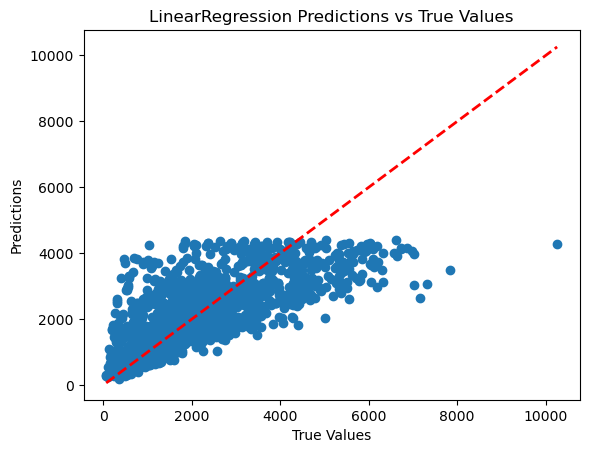

In [26]:
lr = 'LinearRegression.pkl'

if os.path.exists(lr):
    lr_model = joblib.load(lr)
else:
    lr_model = LinearRegression()
    lr_model.fit(x_train, y_train)

    joblib.dump(lr_model, lr)

y_pred_knn = lr_model.predict(x_test)

performance_metrics('LinearRegression', y_pred_knn, y_test)


K-Nearest Neighbors Regressor Mean Squared Error: 1359515.1471
K-Nearest Neighbors Regressor Mean Absolute Error: 853.1408
K-Nearest Neighbors Regressor R^2 Score: 0.3790


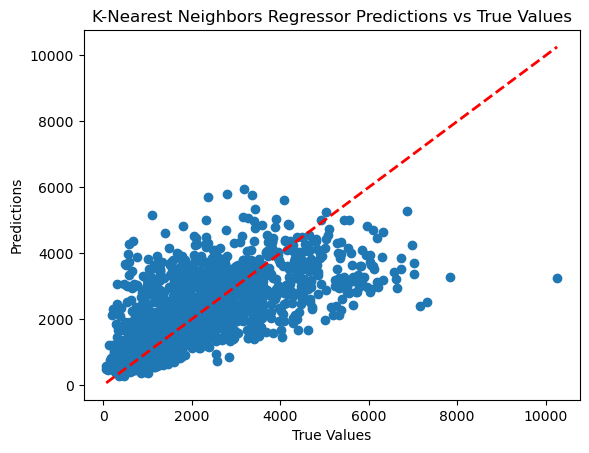

In [27]:
from sklearn.neighbors import KNeighborsRegressor

knn_model_path = 'KNN_model.pkl'

if os.path.exists(knn_model_path):
    knn_model = joblib.load(knn_model_path)
else:
    knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed
    knn_model.fit(x_train, y_train)

    joblib.dump(knn_model, knn_model_path)

y_pred_knn = knn_model.predict(x_test)

performance_metrics('K-Nearest Neighbors Regressor', y_pred_knn, y_test)


#### Random Forest Model

RandomForestRegressor Mean Squared Error: 1284853.4433
RandomForestRegressor Mean Absolute Error: 838.2953
RandomForestRegressor R^2 Score: 0.4131


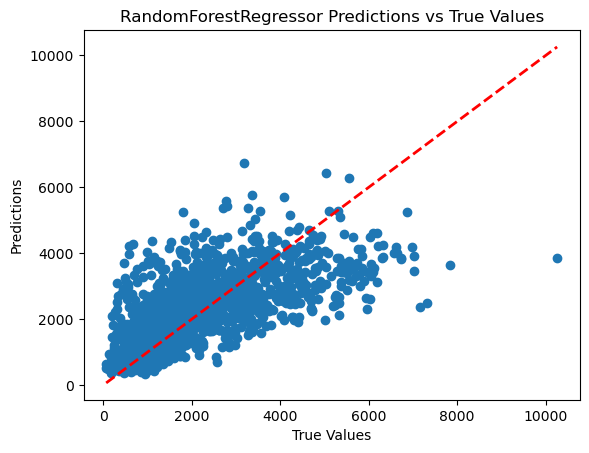

In [28]:
rf = 'RandomForestRegressor.pkl'

if os.path.exists(rf):
    rf_model = joblib.load(rf)
else:
    rf_model = RandomForestRegressor(n_estimators=100,)
    rf_model.fit(x_train, y_train)

    joblib.dump(rf_model, rf)

y_pred_knn = rf_model.predict(x_test)

performance_metrics('RandomForestRegressor', y_pred_knn, y_test)


### Let us make Prediction on test set

In [29]:
test=pd.read_csv("Test.csv")
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [30]:
test.drop(labels=['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis=1, inplace=True)


In [31]:
test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,Medium,Tier 1,Supermarket Type1
1,8.300,reg,0.038428,Dairy,87.3198,NaN,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,NaN,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,NaN,Tier 2,Supermarket Type1
4,NaN,Regular,0.118599,Dairy,234.2300,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...
5676,10.500,Regular,0.013496,Snack Foods,141.3154,Small,Tier 1,Supermarket Type1
5677,7.600,Regular,0.142991,Starchy Foods,169.1448,Medium,Tier 3,Supermarket Type2
5678,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,NaN,Tier 2,Supermarket Type1
5679,15.300,Regular,0.000000,Canned,214.6218,NaN,Tier 2,Supermarket Type1


In [32]:
label_encoder = LabelEncoder()
# List of columns to encode
columns_to_encode = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type']
# Apply label encoding to each column
for column in columns_to_encode:
    test[column] = label_encoder.fit_transform(test[column])

In [33]:
test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,1,0.007565,13,107.8622,1,0,1
1,8.300,4,0.038428,4,87.3198,3,1,1
2,14.600,1,0.099575,11,241.7538,3,2,0
3,7.315,1,0.015388,13,155.0340,3,1,1
4,NaN,2,0.118599,4,234.2300,1,2,3
...,...,...,...,...,...,...,...,...
5676,10.500,2,0.013496,13,141.3154,2,0,1
5677,7.600,2,0.142991,15,169.1448,1,2,2
5678,10.000,1,0.073529,8,118.7440,3,1,1
5679,15.300,2,0.000000,3,214.6218,3,1,1


In [34]:
test.isnull().sum()

Item_Weight             976
Item_Fat_Content          0
Item_Visibility           0
Item_Type                 0
Item_MRP                  0
Outlet_Size               0
Outlet_Location_Type      0
Outlet_Type               0
dtype: int64

In [35]:
test=test.dropna()

In [36]:
test.isnull().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [37]:
predict = rf_model.predict(test)
predict

array([1315.294558, 1320.254768, 3204.648534, ..., 1526.166734,
       3252.992272, 1251.883766])